C:\Users\Anowar Hossain\AppData\Local\Temp\ipykernel_9036\3586792060.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  pdata = pd.read_csv('procurementdata.csv')
C:\Users\Anowar Hossain\AppData\Local\Temp\ipykernel_9036\3586792060.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = pdata.resample('M').sum()['Total Payable']


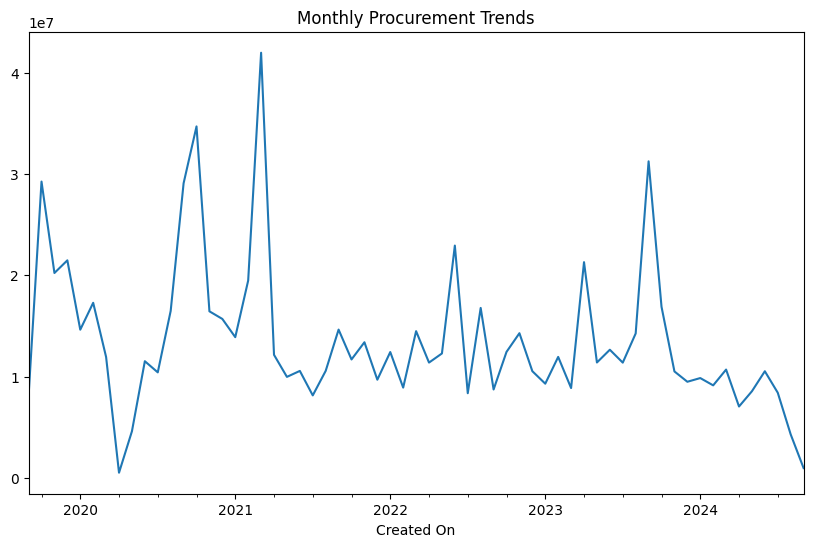

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data with low_memory=False to avoid dtype warning for large files
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert 'Created On' to datetime
pdata['Created On'] = pd.to_datetime(pdata['Created On'], errors='coerce')

# Ensure 'Total Payable' is numeric, coercing errors to NaN
pdata['Total Payable'] = pd.to_numeric(pdata['Total Payable'], errors='coerce')

# Set the date column as the index
pdata.set_index('Created On', inplace=True)

# Drop rows with missing 'Total Payable' or 'Created On'
pdata.dropna(subset=['Total Payable'], inplace=True)

# Resample data by month-end ('ME') and sum up the total procurement value
monthly_data = pdata.resample('ME').sum()['Total Payable']

# Plot to visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data)
plt.title("Monthly Procurement Trends")
plt.xlabel("Month")
plt.ylabel("Total Payable (BDT)")
plt.grid(True)
plt.show()


In [15]:
import pandas as pd

# CSV ফাইল লোড করা
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# 'Total Payable' কলামটিকে সংখ্যা (float) হিসেবে রূপান্তর করা
pdata['Total Payable'] = pd.to_numeric(pdata['Total Payable'], errors='coerce')

# 'Total Payable' এ থাকা মিসিং ভ্যালু (NaN) সরিয়ে ফেলা
pdata = pdata.dropna(subset=['Total Payable'])

# 'Created On' কলামটিকে তারিখে রূপান্তর করা
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# মাস ভিত্তিক পিরিয়ড তৈরি করা
pdata['month'] = pdata['Created On'].dt.to_period('M')

# মাস অনুযায়ী মোট খরচের রিপোর্ট তৈরি করা, মিলিয়ন এ কনভার্ট করা এবং দুই দশমিক পর্যন্ত রাউন্ড করা
monthly_report = pdata.groupby('month')['Total Payable'].sum() / 1e6
monthly_report = monthly_report.round(2)

# আউটপুট দেখানো
print(monthly_report)


month
2019-09     8.12
2019-10    29.25
2019-11    20.23
2019-12    21.48
2020-01    14.63
           ...  
2024-05     8.56
2024-06    10.53
2024-07     8.41
2024-08     4.30
2024-09     0.98
Freq: M, Name: Total Payable, Length: 61, dtype: float64


In [18]:
import pandas as pd

# CSV ফাইল লোড করা
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# 'Total Payable' কলামটিকে সংখ্যা (float) হিসেবে রূপান্তর করা
pdata['Total Payable'] = pd.to_numeric(pdata['Total Payable'], errors='coerce')

# 'Total Payable' এ থাকা মিসিং ভ্যালু (NaN) সরিয়ে ফেলা
pdata = pdata.dropna(subset=['Total Payable'])

# 'Created On' কলামটিকে তারিখে রূপান্তর করা
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# মাস ভিত্তিক পিরিয়ড তৈরি করা
pdata['month'] = pdata['Created On'].dt.to_period('M')

# মাস অনুযায়ী মোট খরচের রিপোর্ট তৈরি করা
monthly_report = pdata.groupby('month')['Total Payable'].sum()

# 'Mn' (মিলিয়ন) এ মান কনভার্ট করা এবং নতুন কলামে সংরক্ষণ করা
monthly_report_mn = (monthly_report / 1e6).round(2).astype(str) + " Mn"

# 'লক্ষ' এ মান কনভার্ট করা এবং নতুন কলামে সংরক্ষণ করা
monthly_report_lakh = (monthly_report / 1e5).round(2).astype(str) + " Lakh"

# নতুন dataframe তৈরি করা যেখানে দুই কলামে 'Mn' এবং 'Lakh' হিসেবে মান দেখানো হবে
output_df = pd.DataFrame({
    'Total Payable (Mn)': monthly_report_mn,
    'Total Payable (Lakh)': monthly_report_lakh
})

# আউটপুট দেখানো
print(output_df)


        Total Payable (Mn) Total Payable (Lakh)
month                                          
2019-09            8.12 Mn           81.23 Lakh
2019-10           29.25 Mn           292.5 Lakh
2019-11           20.23 Mn          202.28 Lakh
2019-12           21.48 Mn          214.78 Lakh
2020-01           14.63 Mn          146.34 Lakh
...                    ...                  ...
2024-05            8.56 Mn           85.59 Lakh
2024-06           10.53 Mn          105.33 Lakh
2024-07            8.41 Mn           84.12 Lakh
2024-08             4.3 Mn           43.03 Lakh
2024-09            0.98 Mn            9.77 Lakh

[61 rows x 2 columns]


Total Orders: 100000
Fully Fulfilled Orders: 99169
Partially Fulfilled Orders: 412

Unfulfilled Orders:
      Received Qty  Delivered Qty  Efficiency
582           16.2      16.200001   99.999995
1047           5.0       5.001000   99.980005
1479           6.4       6.400000   99.999999
1846          36.9      36.900002   99.999996
2054           6.4       6.400000   99.999999


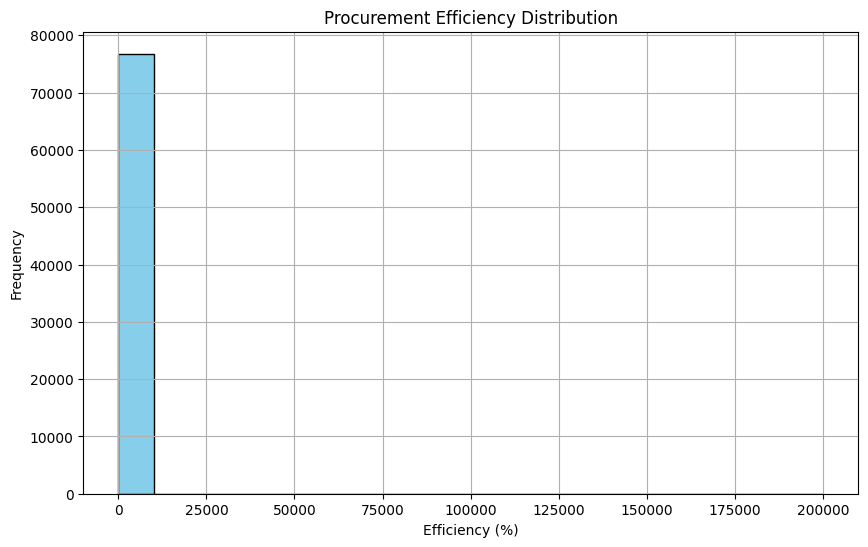

In [19]:
import pandas as pd

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert 'Received Qty' and 'Delivered Qty' to numeric (float)
pdata['Received Qty'] = pd.to_numeric(pdata['Received Qty'], errors='coerce')
pdata['Delivered Qty'] = pd.to_numeric(pdata['Delivered Qty'], errors='coerce')

# Remove rows where either 'Received Qty' or 'Delivered Qty' is missing
pdata = pdata.dropna(subset=['Received Qty', 'Delivered Qty'])

# 1. Procurement Efficiency: Calculate the difference between received and delivered quantities
pdata['Efficiency'] = pdata['Received Qty'] / pdata['Delivered Qty'] * 100  # Percentage

# 2. Unfulfilled Orders: Identify rows where received quantity is less than delivered quantity
unfulfilled_orders = pdata[pdata['Received Qty'] < pdata['Delivered Qty']]

# 3. Fulfillment Analysis: Identify fully fulfilled and partially fulfilled orders
fully_fulfilled_orders = pdata[pdata['Received Qty'] == pdata['Delivered Qty']]
partially_fulfilled_orders = pdata[pdata['Received Qty'] < pdata['Delivered Qty']]

# 4. Summary Statistics
total_orders = pdata.shape[0]
total_fulfilled = fully_fulfilled_orders.shape[0]
total_unfulfilled = unfulfilled_orders.shape[0]

# Print Results
print(f"Total Orders: {total_orders}")
print(f"Fully Fulfilled Orders: {total_fulfilled}")
print(f"Partially Fulfilled Orders: {total_unfulfilled}")
print("\nUnfulfilled Orders:")
print(unfulfilled_orders[['Received Qty', 'Delivered Qty', 'Efficiency']].head())

# You can also visualize the efficiency using a histogram
import matplotlib.pyplot as plt

# Histogram of procurement efficiency
plt.figure(figsize=(10, 6))
pdata['Efficiency'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Procurement Efficiency Distribution')
plt.xlabel('Efficiency (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [20]:
supplier_performance = pdata.groupby('Vendor')[['Received Qty', 'Delivered Qty']].sum()
supplier_performance['Fulfillment Rate'] = (supplier_performance['Received Qty'] / supplier_performance['Delivered Qty']) * 100
supplier_performance = supplier_performance.round(2)
print(supplier_performance)


                                        Received Qty  Delivered Qty  \
Vendor                                                                
A H Motors                                      30.0           30.0   
A K Motors                                       5.0            5.0   
A R RUBBER                                      45.0           45.0   
A S Auto Glass                                   2.0            2.0   
A,H, Motors                                    241.0          241.0   
...                                              ...            ...   
kalam Hardware                                   3.0            3.0   
m/s Alam sha mill                               38.0           38.0   
sawkat Spring & Rubber Works's , Dhaka           3.0            3.0   
star computer                                    1.0            1.0   
vendor name- m/s Loskor motors- magura           4.0            4.0   

                                        Fulfillment Rate  
Vendor           

In [23]:
# Simple audit example to detect duplicate orders by 'Requisition ID'
duplicate_orders = pdata[pdata.duplicated(subset=['Requisition ID'], keep=False)]
print(duplicate_orders)


           SN Requisition ID  \
0      320257    Unavailable   
1      320257    Unavailable   
2      320257    Unavailable   
3      320257    Unavailable   
4      320257    Unavailable   
...       ...            ...   
99995   89040    Unavailable   
99996   89040    Unavailable   
99997   89040    Unavailable   
99998   89039    Unavailable   
99999   89039    Unavailable   

                                                   Title  \
0      Stationary items for DS Line 1 & 2 month of Se...   
1      Stationary items for DS Line 1 & 2 month of Se...   
2      Stationary items for DS Line 1 & 2 month of Se...   
3      Stationary items for DS Line 1 & 2 month of Se...   
4      Stationary items for DS Line 1 & 2 month of Se...   
...                                                  ...   
99995  Batching Plant Material Bin repair & roofing  ...   
99996  Batching Plant Material Bin repair & roofing  ...   
99997  Batching Plant Material Bin repair & roofing  ...   
99998  Requisti

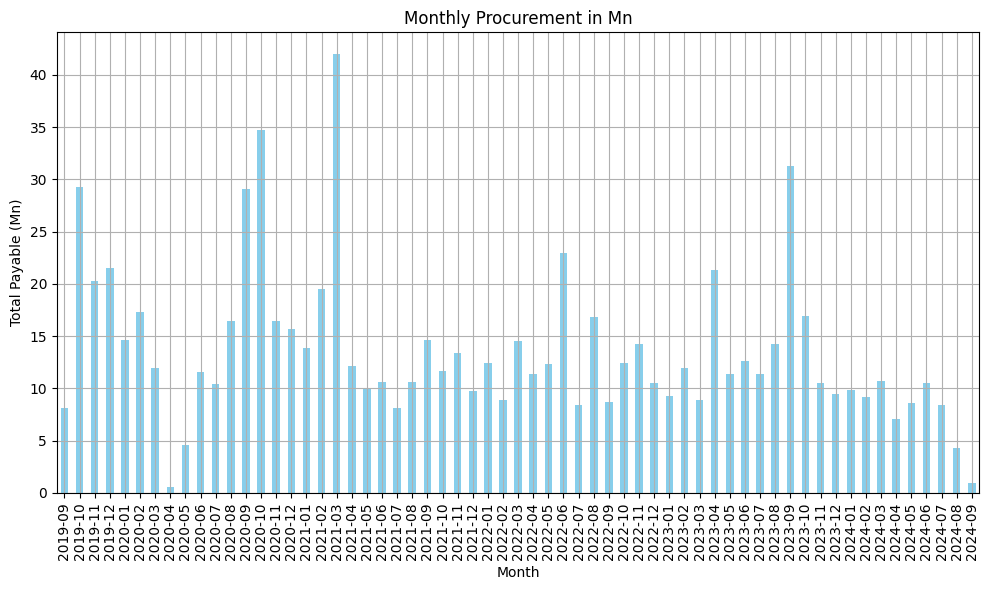

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert 'Total Payable' to numeric (float)
pdata['Total Payable'] = pd.to_numeric(pdata['Total Payable'], errors='coerce')

# Remove rows with missing 'Total Payable' values
pdata = pdata.dropna(subset=['Total Payable'])

# Convert 'Created On' to datetime format
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# Create monthly period
pdata['month'] = pdata['Created On'].dt.to_period('M')

# Group by month and sum 'Total Payable'
monthly_report = pdata.groupby('month')['Total Payable'].sum()

# Convert to Mn for better readability
monthly_report_mn = (monthly_report / 1e6).round(2)

# Plotting the data as a bar chart
plt.figure(figsize=(10, 6))
monthly_report_mn.plot(kind='bar', color='skyblue')
plt.title('Monthly Procurement in Mn')
plt.xlabel('Month')
plt.ylabel('Total Payable (Mn)')
plt.xticks(rotation=90)  # Rotate x-axis labels to make them readable
plt.grid(True)
plt.tight_layout()

# Show the bar chart
plt.show()


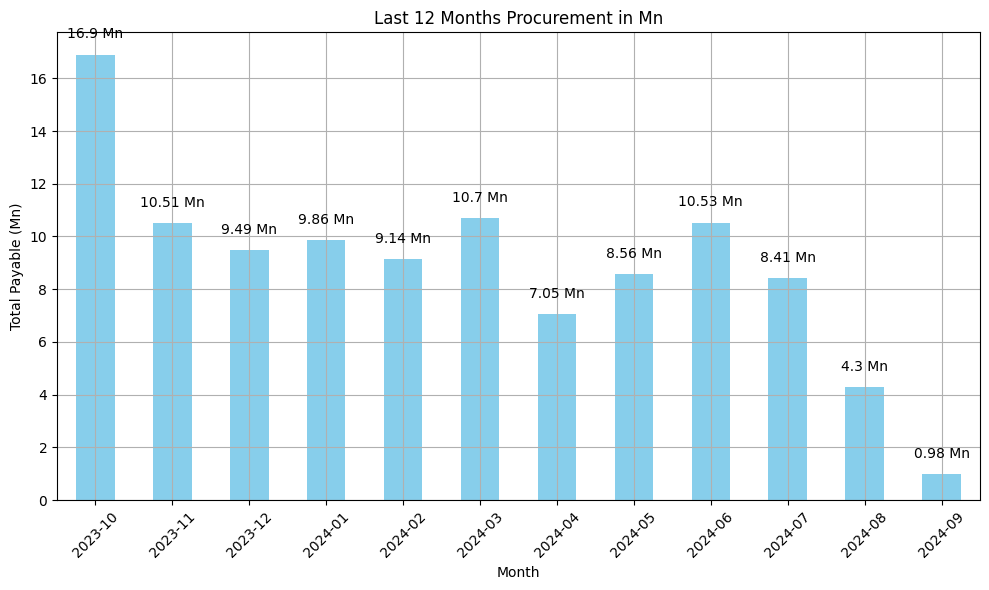

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert 'Total Payable' to numeric (float)
pdata['Total Payable'] = pd.to_numeric(pdata['Total Payable'], errors='coerce')

# Remove rows with missing 'Total Payable' values
pdata = pdata.dropna(subset=['Total Payable'])

# Convert 'Created On' to datetime format
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# Create monthly period
pdata['month'] = pdata['Created On'].dt.to_period('M')

# Group by month and sum 'Total Payable'
monthly_report = pdata.groupby('month')['Total Payable'].sum()

# Select last 12 months of data
last_12_months = monthly_report.tail(12)

# Convert to Mn for better readability
last_12_months_mn = (last_12_months / 1e6).round(2)

# Plotting the data as a bar chart
plt.figure(figsize=(10, 6))
bars = last_12_months_mn.plot(kind='bar', color='skyblue')

# Add text labels for each bar
for i, v in enumerate(last_12_months_mn):
    plt.text(i, v + 0.5, f'{v} Mn', ha='center', va='bottom')

# Title and labels
plt.title('Last 12 Months Procurement in Mn')
plt.xlabel('Month')
plt.ylabel('Total Payable (Mn)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the bar chart
plt.show()


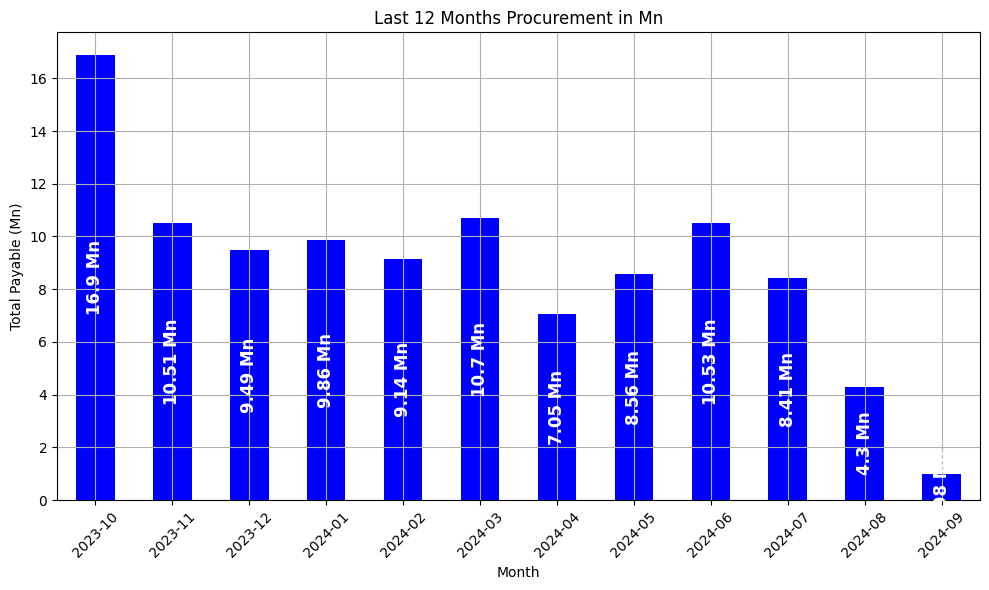

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert 'Total Payable' to numeric (float)
pdata['Total Payable'] = pd.to_numeric(pdata['Total Payable'], errors='coerce')

# Remove rows with missing 'Total Payable' values
pdata = pdata.dropna(subset=['Total Payable'])

# Convert 'Created On' to datetime format
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# Create monthly period
pdata['month'] = pdata['Created On'].dt.to_period('M')

# Group by month and sum 'Total Payable'
monthly_report = pdata.groupby('month')['Total Payable'].sum()

# Select last 12 months of data
last_12_months = monthly_report.tail(12)

# Convert to Mn for better readability
last_12_months_mn = (last_12_months / 1e6).round(2)

# Plotting the data as a bar chart
plt.figure(figsize=(10, 6))
bars = last_12_months_mn.plot(kind='bar', color='blue')

# Add bold and larger text labels, centered inside the bars
for i, v in enumerate(last_12_months_mn):
    plt.text(i, v * 0.5, f'{v} Mn', ha='center', va='center', color='white', 
             fontsize=12, fontweight='bold', rotation=90)

# Title and labels
plt.title('Last 12 Months Procurement in Mn')
plt.xlabel('Month')
plt.ylabel('Total Payable (Mn)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the bar chart
plt.show()
